In [36]:
import pandas as pd
import numpy as np
from datetime import datetime

pd.set_option("display.max_rows", 500)

In [37]:
data_path = '../data/raw/COVID-19/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'
pd_raw = pd.read_csv(data_path)

In [38]:
pd_raw.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,7/20/20,7/21/20,7/22/20,7/23/20,7/24/20,7/25/20,7/26/20,7/27/20,7/28/20,7/29/20
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,35526,35615,35727,35928,35981,36036,36157,36263,36368,36471
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,4171,4290,4358,4466,4570,4637,4763,4880,4997,5105
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,23691,24278,24872,25484,26159,26764,27357,27973,28615,29229
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,884,884,889,889,897,897,897,907,907,918
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,749,779,812,851,880,916,932,950,1000,1078


In [39]:
pd_raw.columns[4:]

Index(['1/22/20', '1/23/20', '1/24/20', '1/25/20', '1/26/20', '1/27/20',
       '1/28/20', '1/29/20', '1/30/20', '1/31/20',
       ...
       '7/20/20', '7/21/20', '7/22/20', '7/23/20', '7/24/20', '7/25/20',
       '7/26/20', '7/27/20', '7/28/20', '7/29/20'],
      dtype='object', length=190)

In [40]:
time_idx=pd_raw.columns[4:]

In [41]:
df_plot = pd.DataFrame({
    'date':time_idx})
df_plot.head()

,date
0,1/22/20
1,1/23/20
2,1/24/20
3,1/25/20
4,1/26/20


In [42]:
pd_raw['Country/Region']

0                           Afghanistan
1                               Albania
2                               Algeria
3                               Andorra
4                                Angola
5                   Antigua and Barbuda
6                             Argentina
7                               Armenia
8                             Australia
9                             Australia
10                            Australia
11                            Australia
12                            Australia
13                            Australia
14                            Australia
15                            Australia
16                              Austria
17                           Azerbaijan
18                              Bahamas
19                              Bahrain
20                           Bangladesh
21                             Barbados
22                              Belarus
23                              Belgium
24                                Benin


In [43]:
pd_raw[pd_raw['Country/Region'] == 'US'].iloc[:,4::].sum(axis=0)[0:4]

1/22/20    1
1/23/20    1
1/24/20    2
1/25/20    2
dtype: int64

In [44]:
country_list = ['Italy',
               'US',
               'Spain',
               'Germany',
               'Korea, South',
               ]


In [45]:
for each in country_list:
    df_plot[each] = np.array(pd_raw[pd_raw['Country/Region'] == each].iloc[:,4::].sum(axis=0))

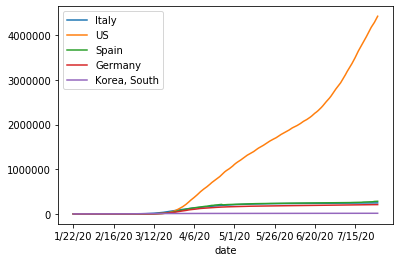

In [46]:
%matplotlib inline
df_plot.set_index('date').plot()


In [47]:
df_plot.head()

,date,Italy,US,Spain,Germany,"Korea, South"
0,1/22/20,0,1,0,0,1
1,1/23/20,0,1,0,0,1
2,1/24/20,0,2,0,0,2
3,1/25/20,0,2,0,0,2
4,1/26/20,0,5,0,0,3


In [48]:
time_idx = [datetime.strptime( each,"%m/%d/%y") for each in df_plot.date]
time_str = [each.strftime('%Y-%m-%d') for each in time_idx]

In [49]:
df_plot['date'] = time_idx
type(df_plot['date'][0])

pandas._libs.tslibs.timestamps.Timestamp

In [50]:
df_plot.head()

,date,Italy,US,Spain,Germany,"Korea, South"
0,2020-01-22,0,1,0,0,1
1,2020-01-23,0,1,0,0,1
2,2020-01-24,0,2,0,0,2
3,2020-01-25,0,2,0,0,2
4,2020-01-26,0,5,0,0,3


In [51]:
df_plot.to_csv('../data/processed/COVID_small_flat_table.csv', sep = ';', index = False)

#Relational data model


In [52]:
data_path = '../data/raw/COVID-19/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'
pd_raw = pd.read_csv(data_path)
pd_raw.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,7/20/20,7/21/20,7/22/20,7/23/20,7/24/20,7/25/20,7/26/20,7/27/20,7/28/20,7/29/20
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,35526,35615,35727,35928,35981,36036,36157,36263,36368,36471
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,4171,4290,4358,4466,4570,4637,4763,4880,4997,5105
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,23691,24278,24872,25484,26159,26764,27357,27973,28615,29229
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,884,884,889,889,897,897,897,907,907,918
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,749,779,812,851,880,916,932,950,1000,1078


In [53]:
pd_data_base = pd_raw.rename(columns = {'Country/Region': 'country',
                                       'Province/State': 'state'})

In [54]:
pd_data_base = pd_data_base.drop(['Lat', 'Long'], axis= 1)
pd_data_base.head()

,state,country,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,...,7/20/20,7/21/20,7/22/20,7/23/20,7/24/20,7/25/20,7/26/20,7/27/20,7/28/20,7/29/20
0,NaN,Afghanistan,0,0,0,0,0,0,0,0,...,35526,35615,35727,35928,35981,36036,36157,36263,36368,36471
1,NaN,Albania,0,0,0,0,0,0,0,0,...,4171,4290,4358,4466,4570,4637,4763,4880,4997,5105
2,NaN,Algeria,0,0,0,0,0,0,0,0,...,23691,24278,24872,25484,26159,26764,27357,27973,28615,29229
3,NaN,Andorra,0,0,0,0,0,0,0,0,...,884,884,889,889,897,897,897,907,907,918
4,NaN,Angola,0,0,0,0,0,0,0,0,...,749,779,812,851,880,916,932,950,1000,1078


In [55]:
test_pd = pd_data_base.set_index(['state', 'country']).T

In [56]:
test_pd.columns

MultiIndex([(                           nan,           'Afghanistan'),
            (                           nan,               'Albania'),
            (                           nan,               'Algeria'),
            (                           nan,               'Andorra'),
            (                           nan,                'Angola'),
            (                           nan,   'Antigua and Barbuda'),
            (                           nan,             'Argentina'),
            (                           nan,               'Armenia'),
            ('Australian Capital Territory',             'Australia'),
            (             'New South Wales',             'Australia'),
            ...
            (                           nan,                'Malawi'),
            ( 'Falkland Islands (Malvinas)',        'United Kingdom'),
            (   'Saint Pierre and Miquelon',                'France'),
            (                           nan,           'South

In [57]:
pd_relational_test = test_pd.stack(level= [0,1]).reset_index()

In [58]:
pd_relational_model = pd_relational_test.rename(columns = {'level_0': 'date',
                                                              0: 'confirmed'})

In [59]:
pd_relational_model.head()

,date,state,country,confirmed
0,1/22/20,NaN,Afghanistan,0.0
1,1/22/20,NaN,Albania,0.0
2,1/22/20,NaN,Algeria,0.0
3,1/22/20,NaN,Andorra,0.0
4,1/22/20,NaN,Angola,0.0


In [60]:
pd_relational_model.dtypes

date          object
state         object
country       object
confirmed    float64
dtype: object

In [61]:
pd_relational_model['date'] = pd_relational_model.date.astype('datetime64[ns]')

In [62]:
pd_relational_model.dtypes

date         datetime64[ns]
state                object
country              object
confirmed           float64
dtype: object

In [63]:
pd_relational_model.to_csv('../data/processed/COVID_relational_confirmed.csv', sep = ';')

# Data Underdtanding EDA open

# Group-by apply

In [64]:
pd_JH_data = pd.read_csv('../data/processed/COVID_relational_confirmed.csv', sep = ';', parse_dates = [0])
pd_JH_data = pd_JH_data.sort_values('date', ascending = True).reset_index(drop = True).copy()
pd_JH_data.head()

,date,state,country,confirmed
0,2020-01-22,Alberta,Canada,0.0
1,2020-01-22,no,"Korea, South",1.0
2,2020-01-22,no,Kosovo,0.0
3,2020-01-22,no,Kuwait,0.0
4,2020-01-22,no,Kyrgyzstan,0.0


In [65]:
test_data = pd_JH_data[((pd_JH_data['country'] == 'US')|
                      (pd_JH_data['country'] == 'Germany'))&
                     ((pd_JH_data['date']> '2020-03-20'))]
                     

In [66]:
test_data

,date,state,country,confirmed
15737,2020-03-21,no,Germany,22213.0
15776,2020-03-21,no,US,25825.0
16002,2020-03-22,no,Germany,24873.0
16057,2020-03-22,no,US,33761.0
16268,2020-03-23,no,Germany,29056.0
16308,2020-03-23,no,US,43850.0
16535,2020-03-24,no,Germany,32986.0
16575,2020-03-24,no,US,54112.0
16801,2020-03-25,no,Germany,37323.0
16841,2020-03-25,no,US,66055.0


In [67]:
test_data.groupby(['country']).agg(np.max)

,date,state,confirmed
country,,,
Germany,2020-07-29,no,208546.0
US,2020-07-29,no,4426982.0


In [69]:
# %load ../src/features/build_features.py
import numpy as np
from sklearn import linear_model
reg = linear_model.LinearRegression(fit_intercept = True)

def get_doubling_time_via_regression(in_array):
    '''Using a linear regression to approximate the doubling rate'''
    
    y = np.array(in_array)
    X = np.arange(-1,2).reshape(-1,1)
    
    assert len(in_array) == 3
    reg.fit(X,y)
    intercept = reg.intercept_
    slope = reg.coef_
    
    return intercept/slope


#if __name__ == '__main__':
#    test_data2 = np.array([2,4,6])
#    result = get_doubling_time_via_regression(test_data2)
#    print('The test slope is:' + str(result))
    

    


In [70]:
test_data.groupby(['state', 'country']).agg(np.max)

date  confirmed
state country                      
no    Germany 2020-07-29   208546.0
      US      2020-07-29  4426982.0

In [71]:
#test_data.groupby(['state', 'country']).apply(get_doubling_time_via_regression)

In [72]:
def rolling_reg(df_input,col='confirmed'):
    '''input has to be a data frame'''
    '''return is a single series (mandatory for group by apply)'''
    
    days_back = 3
    result = df_input[col].rolling(
                window = days_back,
                min_periods = days_back).apply(get_doubling_time_via_regression,raw = False)
    return result

In [73]:
test_data[['state','country','confirmed']].groupby(['state','country']).apply(rolling_reg,'confirmed')

state  country       
no     Germany  15737            NaN
                16002            NaN
                16268       7.417994
                16535       7.142035
                16801       8.012983
                17067       6.954407
                17333       6.501919
                17598       7.390371
                17865      10.136671
                18130      13.541893
                18397      13.781393
                18663      13.140681
                18929      12.037271
                19194      12.735506
                19460      16.052694
                19726      21.372453
                19993      27.427355
                20259      27.511936
                20525      21.792179
                20790      21.495848
                21056      26.565108
                21323      36.198404
                21589      43.982990
                21855      49.423444
                22121      74.043747
                22386      56.424411
                

In [74]:
test_data

,date,state,country,confirmed
15737,2020-03-21,no,Germany,22213.0
15776,2020-03-21,no,US,25825.0
16002,2020-03-22,no,Germany,24873.0
16057,2020-03-22,no,US,33761.0
16268,2020-03-23,no,Germany,29056.0
16308,2020-03-23,no,US,43850.0
16535,2020-03-24,no,Germany,32986.0
16575,2020-03-24,no,US,54112.0
16801,2020-03-25,no,Germany,37323.0
16841,2020-03-25,no,US,66055.0


In [75]:
pd_DR_result = pd_JH_data[['state', 'country', 'confirmed']].groupby(['state', 'country']).apply(rolling_reg, 'confirmed').reset_index()

In [76]:
pd_DR_result = pd_DR_result.rename(columns = {'confirmed': 'confirmed_DR',
                              'level_2' : 'index'})

pd_DR_result.head()

,state,country,index,confirmed_DR
0,Alberta,Canada,0,NaN
1,Alberta,Canada,466,NaN
2,Alberta,Canada,731,NaN
3,Alberta,Canada,965,NaN
4,Alberta,Canada,1233,NaN


In [80]:
pd_JH_data = pd_JH_data.reset_index()
pd_JH_data.head()

,index,date,state,country,confirmed
0,0,2020-01-22,Alberta,Canada,0.0
1,1,2020-01-22,no,"Korea, South",1.0
2,2,2020-01-22,no,Kosovo,0.0
3,3,2020-01-22,no,Kuwait,0.0
4,4,2020-01-22,no,Kyrgyzstan,0.0


In [82]:
pd_result_large = pd.merge(pd_JH_data, pd_DR_result[['index', 'confirmed_DR']], on = ['index'], how = 'left')
pd_result_large.head()

,index,date,state,country,confirmed,confirmed_DR
0,0,2020-01-22,Alberta,Canada,0.0,NaN
1,1,2020-01-22,no,"Korea, South",1.0,NaN
2,2,2020-01-22,no,Kosovo,0.0,NaN
3,3,2020-01-22,no,Kuwait,0.0,NaN
4,4,2020-01-22,no,Kyrgyzstan,0.0,NaN


# Filtering the data with group-by apply

In [83]:
from scipy import signal

def savgol_filter(df_input,column='confirmed',window=5):
    ''' Savgol Filter which can be used in groupby apply function 
        it ensures that the data structure is kept'''
    
    window=5, 
    degree=1
    df_result=df_input
    
    filter_in=df_input[column].fillna(0) # attention with the neutral element here
    
    result=signal.savgol_filter(np.array(filter_in),
                           5, # window size used for filtering
                           1)
    df_result[column+'_filtered']=result
    return df_result

In [84]:
pd_filtered_result=pd_JH_data[['state','country','confirmed']].groupby(['state','country']).apply(savgol_filter).reset_index()

In [87]:
pd_result_large=pd.merge(pd_result_large,pd_filtered_result[['index','confirmed_filtered']],on=['index'],how='left')
pd_result_large.head()


,index,date,state,country,confirmed,confirmed_DR,confirmed_filtered
0,0,2020-01-22,Alberta,Canada,0.0,NaN,0.0
1,1,2020-01-22,no,"Korea, South",1.0,NaN,0.8
2,2,2020-01-22,no,Kosovo,0.0,NaN,0.0
3,3,2020-01-22,no,Kuwait,0.0,NaN,0.0
4,4,2020-01-22,no,Kyrgyzstan,0.0,NaN,0.0


# Filtered doubling rate

In [88]:
pd_filtered_doubling=pd_result_large[['state','country','confirmed_filtered']].groupby(['state','country']).apply(rolling_reg,'confirmed_filtered').reset_index()

pd_filtered_doubling=pd_filtered_doubling.rename(columns={'confirmed_filtered':'confirmed_filtered_DR',
                             'level_2':'index'})

pd_filtered_doubling.tail()

,state,country,index,confirmed_filtered_DR
50535,no,Zimbabwe,49304,16.729320
50536,no,Zimbabwe,49572,17.722181
50537,no,Zimbabwe,49806,19.947231
50538,no,Zimbabwe,50072,22.618947
50539,no,Zimbabwe,50539,23.336402


In [89]:
pd_result_large=pd.merge(pd_result_large,pd_filtered_doubling[['index','confirmed_filtered_DR']],on=['index'],how='left')
pd_result_large.tail()

,index,date,state,country,confirmed,confirmed_DR,confirmed_filtered,confirmed_filtered_DR
50535,50535,2020-07-29,no,Barbados,110.0,inf,110.4,275.000000
50536,50536,2020-07-29,no,Belarus,67518.0,504.706617,67507.0,532.230648
50537,50537,2020-07-29,no,Belgium,67335.0,147.317163,67206.0,173.470405
50538,50538,2020-07-29,no,Albania,5105.0,44.391111,5110.4,42.678632
50539,50539,2020-07-29,no,Zimbabwe,2879.0,32.000000,2908.2,23.336402


In [90]:
mask=pd_result_large['confirmed']>100
pd_result_large['confirmed_filtered_DR']=pd_result_large['confirmed_filtered_DR'].where(mask, other=np.NaN)

In [92]:
pd_result_large[pd_result_large['country']=='Germany'].tail()

,index,date,state,country,confirmed,confirmed_DR,confirmed_filtered,confirmed_filtered_DR
49251,49251,2020-07-25,no,Germany,206278.0,294.336435,206112.2,355.232285
49519,49519,2020-07-26,no,Germany,206667.0,394.998723,206677.4,364.026021
49784,49784,2020-07-27,no,Germany,207112.0,495.649081,207262.0,359.512727
50050,50050,2020-07-28,no,Germany,207707.0,398.388462,207819.6,362.901418
50317,50317,2020-07-29,no,Germany,208546.0,289.802417,208377.2,372.703730


In [93]:
pd_result_large.to_csv('../data/processed/COVID_final_set.csv',sep=';',index=False)